<a href="https://colab.research.google.com/github/Tanju8/my-assignment/blob/main/ML_finlal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tomato leaf disease classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install -q kagglehub albumentations

import kagglehub
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset_path = kagglehub.dataset_download('ashishmotwani/tomato')
print("Dataset downloaded to:", dataset_path)

100%|██████████| 1.37G/1.37G [00:15<00:00, 97.4MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/ashishmotwani/tomato/versions/1


In [ ]:
# List the contents of the downloaded dataset directory
print("Contents of the dataset directory:")
print(os.listdir(dataset_path))

Contents of the dataset directory:
['train', 'valid']


In [ ]:
TRAIN_DIR = os.path.join(dataset_path, 'train')
VAL_DIR = os.path.join(dataset_path, 'valid')

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

class_names = list(train_generator.class_indices.keys())

print("Classes:", class_names)

Found 25851 images belonging to 11 classes.
Found 6683 images belonging to 11 classes.
Classes: ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


In [12]:
base_model = EfficientNetB0(
    include_top=False,               # Remove default classification head
    weights='imagenet',             # Use pretrained weights
    input_shape=(224, 224, 3)       # Input shape (match our image size)
)


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2305s 3s/step - accuracy: 0.1078 - loss: 2.3977 - val_accuracy: 0.1205 - val_loss: 2.3584
Epoch 2/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2235s 3s/step - accuracy: 0.1126 - loss: 2.3708 - val_accuracy: 0.1119 - val_loss: 2.3564
Epoch 3/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2182s 3s/step - accuracy: 0.1162 - loss: 2.3673 - val_accuracy: 0.1185 - val_loss: 2.3564
Epoch 4/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2208s 3s/step - accuracy: 0.1207 - loss: 2.3680 - val_accuracy: 0.1116 - val_loss: 2.3559
Epoch 5/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2315s 3s/step - accuracy: 0.1197 - loss: 2.3643 - val_accuracy: 0.1205 - val_loss: 2.3559
Epoch 6/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2201s 3s/step - accuracy: 0.1246 - loss: 2.3686 - val_accuracy: 0.1187 - val_loss: 2.3555
Epoch 7/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2183s 3s/step - accuracy: 0.1209 - loss: 2.3660 - val_accuracy: 0.1193 - val_loss: 2.3550
Epoch 8/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 2181s 3s/step - accuracy: 0.1206 - loss: 2.3661 - 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

209/209 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.1152 - loss: 2.3540
Validation Accuracy: 0.11
Validation Loss: 2.36


In [16]:
import numpy as np
from sklearn.metrics import classification_report

# Get true and predicted labels
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


209/209 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.00      0.00      0.00       732
                        Early_blight       0.00      0.00      0.00       643
                         Late_blight       0.07      0.00      0.00       792
                           Leaf_Mold       0.00      0.00      0.00       739
                  Septoria_leaf_spot       0.11      1.00      0.20       746
Spider_mites Two-spotted_spider_mite       0.00      0.00      0.00       435
                         Target_Spot       0.00      0.00      0.00       457
       Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00       498
                 Tomato_mosaic_virus       0.00      0.00      0.00       584
                             healthy       0.00      0.00      0.00       805
                      powdery_mildew       0.00      0.00      0.00       252

                    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


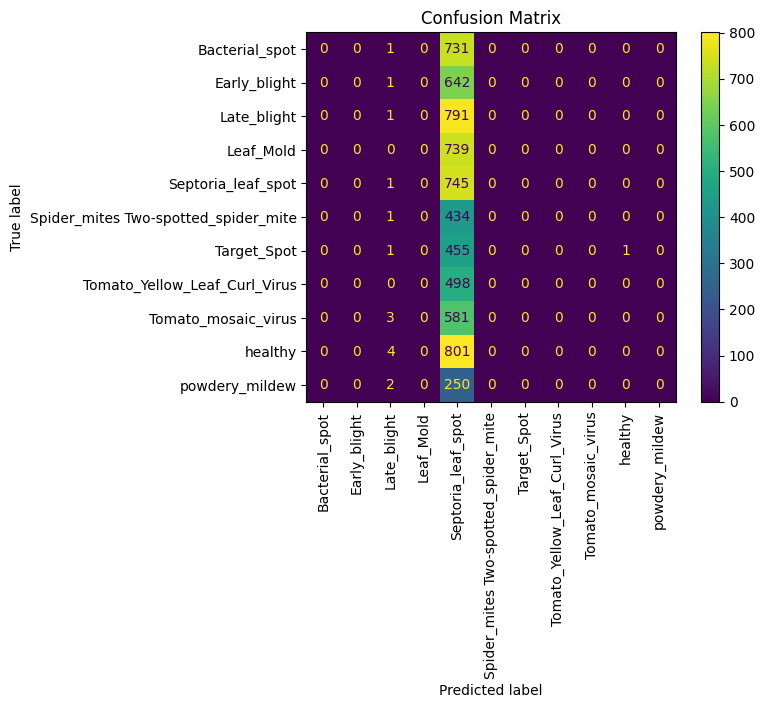

In [18]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [14]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion_matrix' is not defined